In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jieba
jieba.set_dictionary('dict.txt.big')
stopwords = [ line.rstrip() for line in open('stop_words.txt' , encoding='utf8') ] # if you want to use you should modify it yourself
    
# from pprint import pprint
import requests
import json

import math

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from pylab import rcParams

import string

In [82]:
df_train = pd.read_csv('resumeQuestions.csv')
df_train.head()

,ans,cat,id,question
0,1,關於我,1,自己
1,1,關於我,1,可以請您介紹一下自己嗎
2,1,關於我,1,請用四個形容詞形容自己
3,1,關於我,1,你是怎麼樣的一個人
4,1,關於我,1,你有什麼特質


# Data Description

In [83]:
df_train.head()

,ans,cat,id,question
0,1,關於我,1,自己
1,1,關於我,1,可以請您介紹一下自己嗎
2,1,關於我,1,請用四個形容詞形容自己
3,1,關於我,1,你是怎麼樣的一個人
4,1,關於我,1,你有什麼特質


In [84]:
print("Rows=", len(df_train))

Rows= 58


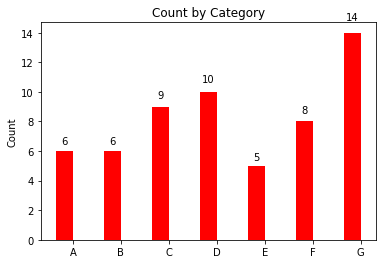

A 專案 6
B 獎項 6
C 經歷 9
D 興趣 10
E 論文 5
F 證照 8
G 關於我 14


In [85]:
df_train = pd.read_csv('resumeQuestions.csv')

main_series = df_train.groupby('cat').count()['ans']

N = len(main_series)
means = list(main_series)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, means, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_title('Count by Category')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels("ABCDEFG")


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

for i in range(len(list(main_series.index))):
    label = 'ABCDEFG'
    print(label[i], main_series.index[i], list(main_series)[i])

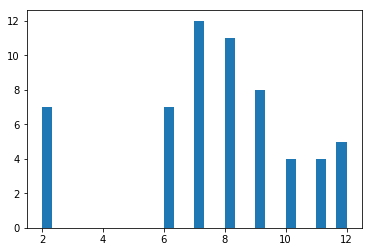

In [86]:
plt.hist(df_train['question'].apply(lambda x : len(x)), bins=30)
plt.show()

# Cut Words

In [87]:
def preprocess(row):
    words = list(jieba.cut(row['question'], cut_all=True)) ## cut sentences into words
    row['words'] = words
    return row
df_train = df_train.apply(preprocess, axis=1)

Building prefix dict from /Users/fan/Documents/Github/Other Project/HsinchuHackthon_QA1999_ClassifierTraining-master/dict.txt.big ...
Loading model from cache /var/folders/32/4nbdc94x4w71n8cppyr49lz00000gn/T/jieba.u2cab9f93cecf5db1d976acff71832dce.cache
Loading model cost 1.615 seconds.
Prefix dict has been built successfully.


In [88]:
# df_train['words'] = list(filter(lambda a: a not in stopwords and a != '\n', df_train['words']))

In [89]:
df_train.head()

,ans,cat,id,question,words
0,1,關於我,1,自己,[自己]
1,1,關於我,1,可以請您介紹一下自己嗎,"[可以, 請, 您, 介紹, 一下, 下自, 自己, 嗎]"
2,1,關於我,1,請用四個形容詞形容自己,"[請用, 四個, 形容, 形容詞, 詞形, 形容, 自己]"
3,1,關於我,1,你是怎麼樣的一個人,"[你, 是, 怎麼, 怎麼樣, 的, 一個, 個人]"
4,1,關於我,1,你有什麼特質,"[你, 有, 什麼, 特質]"


In [90]:
cat_mapping = {}
for num, cat in enumerate(list(set(df_train['cat']))):
    cat_mapping[cat] = num

In [106]:
with open('cat_mapping', 'w', encoding='utf8') as f:
    json.dump(cat_mapping, f, ensure_ascii=False)

In [107]:
# save into json data
with open('ProcessedDataResume.json', 'w', encoding='utf8') as f:
    data = list(df_train.T.to_dict().values())
    json.dump(data, f, ensure_ascii=False)

### WordCloud
顯示最常出現的文字

專案


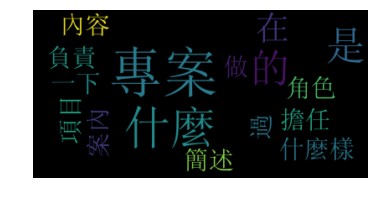

興趣


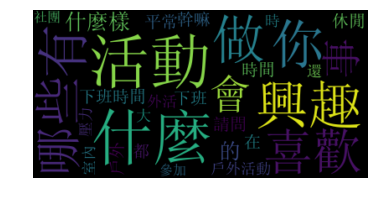

獎項


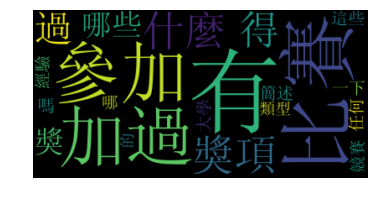

關於我


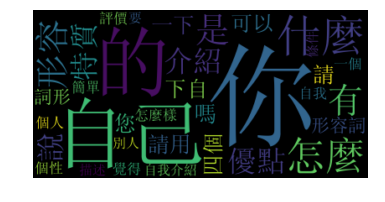

經歷


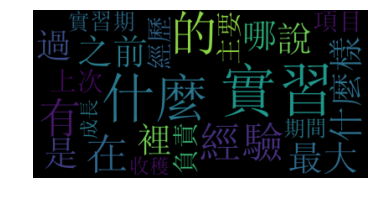

證照


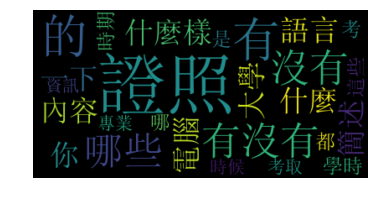

論文


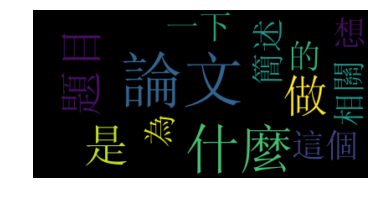

In [94]:
from wordcloud import WordCloud
from collections import Counter

freqs = []
for cat in list(set(df_train['cat'])):
    words_Li = list(df_train[df_train['cat'] == cat]['words'])
    total_words_in_cat = []
    for words in words_Li:
        total_words_in_cat.extend(words)
    freq = Counter(total_words_in_cat)
    print(cat)
    wordcloud = WordCloud(font_path="simsun.ttf")
    wordcloud.generate_from_frequencies(frequencies=freq)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show() 

# reload data

In [95]:
def getprocessed():
    with open('ProcessedDataResume.json', 'r', encoding='utf8') as f:
        data = json.load(f)
    df = pd.DataFrame(data)
    return df

with open('cat_mapping', 'r' , encoding='utf8') as f:
    cat_mapping = json.load(f)
    
df_train = getprocessed()
df_train.head()

,ans,cat,id,question,words
0,1,關於我,1,自己,[自己]
1,1,關於我,1,可以請您介紹一下自己嗎,"[可以, 請, 您, 介紹, 一下, 下自, 自己, 嗎]"
2,1,關於我,1,請用四個形容詞形容自己,"[請用, 四個, 形容, 形容詞, 詞形, 形容, 自己]"
3,1,關於我,1,你是怎麼樣的一個人,"[你, 是, 怎麼, 怎麼樣, 的, 一個, 個人]"
4,1,關於我,1,你有什麼特質,"[你, 有, 什麼, 特質]"


# add category itself as question

In [96]:
print('Preprocess Length = ', len(df_train))

addedrow = []
for key, value in cat_mapping.items():
    row = {}
    words = list(jieba.cut(key, cut_all=False))
    row['words'] = words
    
    row = {'ans': None,
            'cat': key,
            'cat_num': value,
            'id': None,
            'question': key,
            'words':words
          }
    addedrow.append(row)
addeddf = pd.DataFrame(addedrow)
df_train = pd.concat([df_train, addeddf])
print('Processed Length = ', len(df_train))

Preprocess Length =  58
Processed Length =  65


/Users/fan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



# transfer to vector

In [97]:
total_li = []
for li in list(df_train['words']):
    total_li += li
vectorterms = list(set(total_li))

def process_into_vector(row):
    self_main_list = [0] * len(vectorterms)
    for term in row['words']:
        idx = vectorterms.index(term)
        self_main_list[idx] += 1
    row['vector'] = self_main_list
    row['cat_num'] = cat_mapping.get(row['cat'])
    return row
df_train = df_train.apply(process_into_vector, axis=1)
df_train.index = range(len(df_train))

In [98]:
# due to the consistency of training and prediction preprocess, we have to recore the word od the dimension in a vector
with open('vectorterms', 'w', encoding='utf8') as f:
    json.dump(vectorterms, f, ensure_ascii=False)

In [99]:
df_train.head()

,ans,cat,cat_num,id,question,words,vector
0,1.0,關於我,3,1.0,自己,[自己],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1.0,關於我,3,1.0,可以請您介紹一下自己嗎,"[可以, 請, 您, 介紹, 一下, 下自, 自己, 嗎]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
2,1.0,關於我,3,1.0,請用四個形容詞形容自己,"[請用, 四個, 形容, 形容詞, 詞形, 形容, 自己]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1.0,關於我,3,1.0,你是怎麼樣的一個人,"[你, 是, 怎麼, 怎麼樣, 的, 一個, 個人]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1.0,關於我,3,1.0,你有什麼特質,"[你, 有, 什麼, 特質]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [100]:
X = np.array(list(df_train['vector']))
Y = np.array(df_train['cat_num'])
print(X.shape)
print(Y.shape)

(65, 115)
(65,)


# Start Training

## SVM

In [101]:
svm_clf = SVC(C=2, kernel='linear')
svm_clf.fit(X, Y)

y_pred = svm_clf.predict(X)
print("Number of mislabeled points out of a total %d points : %d" % (X.shape[0],(Y != y_pred).sum()))

Number of mislabeled points out of a total 65 points : 0


### Store Model

In [91]:
from sklearn.externals import joblib
svm_clf = SVC(C=2, kernel='linear')
svm_clf.fit(X, Y)
joblib.dump(svm_clf, "train1_SVM_model.m")

['train1_SVM_model.m']

# Application

In [103]:
import jieba
jieba.set_dictionary('dict.txt.big')

import pandas as pd
# import requests
import xgboost as xgb
import json
import numpy as np

In [104]:
bst = xgb.Booster({'nthread': 4})  # init model
# bst.load_model('20171127 125648530042.model')  # load data, you may have to read which model you saved
bst.load_model('20190522 201838741465.model')  # load data, you may have to read which model you saved

with open('cat_mapping', 'r' , encoding='utf8') as f:
    cat_mapping = json.load(f)

with open('vectorterms_nonword2vec', 'r' , encoding='utf8') as f:
    vectorterms = json.load(f)
    
def predict_cat(test_sentence, model='svm', prin=False):
    words = list(jieba.cut(test_sentence, cut_all=False))
    
    self_main_list = [0] * len(vectorterms)
    for term in words:
        if term in vectorterms:
            idx = vectorterms.index(term)
            self_main_list[idx] += 1
        
    vector = self_main_list
    cat_num = svm_clf.predict(np.array([vector,]))[0]

    cat = None
    for key, value in cat_mapping.items():
        if str(int(cat_num)) == str(value):
            cat = key

    if prin:
        print(test_sentence)
        print(", ".join(words))
        print(cat_num)
        print(cat)
    return cat

In [105]:
predict_cat('你有什麼樣的經歷', 'svm')

Building prefix dict from /Users/fan/Documents/Github/Other Project/HsinchuHackthon_QA1999_ClassifierTraining-master/dict.txt.big ...
Loading model from cache /var/folders/32/4nbdc94x4w71n8cppyr49lz00000gn/T/jieba.u2cab9f93cecf5db1d976acff71832dce.cache
Loading model cost 3.252 seconds.
Prefix dict has been built successfully.


'關於我'